# Tutorial 1 (FIRE) Data Exploration and Visualization (Getting to know our data) - Group 3

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download the dataset stored in our github package "DMLL-F21DL"

In [5]:
FIRE_PATH = os.path.join("datasets", "fire")
FIRE_URL = "https://raw.githubusercontent.com/Gowresh-HW/DMLL-F21DL/main/Dataset/fire_archive.csv"
STORAGE_PATH = "/home/marc/notebook/datasets/fire/fire_archive.csv"
def fetch_fire_data(fire_url=FIRE_URL, fire_path=FIRE_PATH, storage_path=STORAGE_PATH):
    os.makedirs(fire_path, exist_ok=True)
    urllib.request.urlretrieve(fire_url,storage_path)

In [6]:
#fetch_fire_data()
# calling the function fetch_fire_data, (defined above) creates a datasets/fire directory in our workspace, 
# downloads fire_archive.csv file to this directory 

`load_fire_data` function loads the `fire_archive.csv` into a panda `dataframe`

In [7]:
def load_fire_data(fire_path=FIRE_PATH):
    csv_path = os.path.join(fire_path, "fire_archive.csv")
    return pd.read_csv(csv_path)

In [8]:
fire = load_fire_data() # "fire" now becomes a pandas DataFrame object containing all the data
fire.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .
#A1: There are totally 15 attributes in the dataset. The latitude and longitude attributes refer to the 
#    geographic location of the hotspots detected by the satellites. The brightness attribute is the pixel
#    measurement of the temperature in Kelvin. Scan and Track attributes refers to the pixel measurement of 
#    the scanned area. acq_date refers to the date of acquisition of data while acq_time refers to the time spent
#    during the acquisition of data. Satellite attribute refers to which satellite was used for acquiring the data 
#    while instrument refers to the instrument used by the satellites for measurmeent. Confidence refers to the
#    quality of the hostpot in the specified region of interest. This parameter can be used to predict whether an 
#    hostspot is a fired area or not. This will be our target feature (Values greater than 60% or 70% ususally
#    mean the hotspot is actually a firespot). Version attribute refers to the collection of source. bright_t31 
#    is the pixel measurement of temperature in the 3-1 Channel. frp attribute depicts the pixel-integrated 
#    fire radiative power in MW (Mega Watts). Daynight attribute refers to when the instance were obtained, whether
#    day or night. Finally the type attribute refers to the type of environment of the instance.

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,NaN,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,NaN,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,NaN,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,NaN,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,NaN,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [9]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
fire.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 
#A2: There are no missing values in the dataset, fortunately. This will probably help us in accurately predicting 
#     the target feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36006 non-null  float64
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 4.1+ MB


All attributes are numerical, except the acq_date, satellite, instrument and daynight. We need to explore the 
possibility of changing the data type of acq_date as it cannot be considered as a categorical data.

In [10]:
print(fire["daynight"].value_counts())
print(fire["instrument"].value_counts())
print(fire["satellite"].value_counts())
# Q3 What does the value_count() method display?
# A3: The value_count() displays the number of values in each category of an attribute across the dataset. Here
#     there are 28,203 values indicating that the respective measurements were taken during daytime while 7,808 
#     values indicating that those measurements were taken during night time. The satelliete dataset has two 
#     categories indicating the model of satellite that was used for measurmenet. It is observed that the 
#     instrument attribute has only one category  across the entire dataset, which clearly indicates that the 
#     attribute can dropped from the dataset when processing. 

D    28203
N     7808
Name: daynight, dtype: int64
MODIS    36011
Name: instrument, dtype: int64
Aqua     20541
Terra    15470
Name: satellite, dtype: int64


In [11]:
#This method shows a statistical summary of the numerical attributes 
fire.describe() 

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36006.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.101261,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369789,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

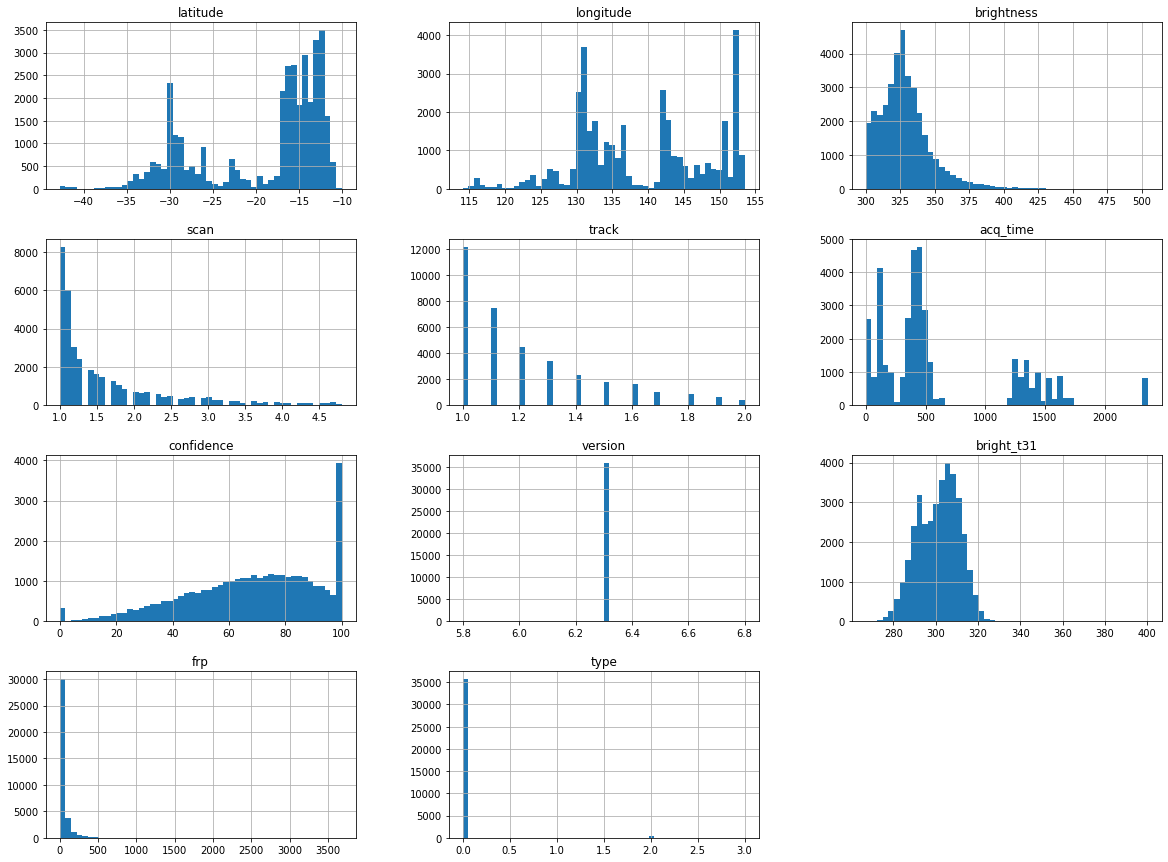

In [12]:
#To plot a histogram for each numerical attribute
fire.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram
# A4: The statistical summary and the histograms do not consider the categorical data or more precisely they do not
#     consider the object type of data. While the acq_date is not a categorical data, we have to consider the 
#     activity of changing the data type.


# Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

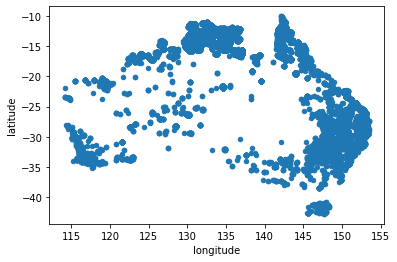

In [13]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
# A5: The first plot does not help us in finding any particular pattern. The second plot is comparitively better
#     in representing the density of areas where the measurement were taken. The third plot is more indicative
#     as we can understand the different confidence levels of hotspot across the areas.
fire.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

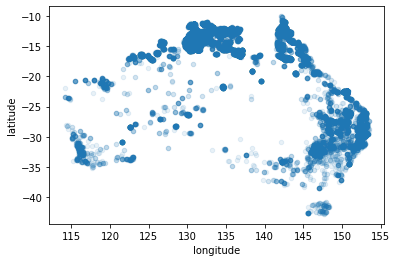

In [14]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The above plot helps us  to better understand the density of the areas where the measurements were taken 

No handles with labels found to put in legend.


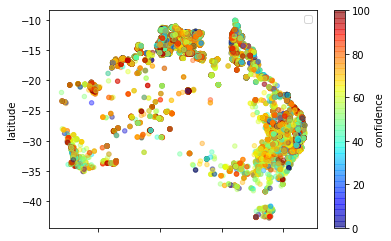

In [15]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    #s=fire["brightness"]/100, label="brightness", figsize=(10,7),
    c="confidence", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots the confidence of the hotspots with red being high confidence and blue being low confidence. 


In [16]:
# Now we will look at the correlation of all the attributes with the expected class attribute (confidence)
corr_matrix = fire.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [17]:
corr_matrix["confidence"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.confidence)?
# Does that make sense?
# A6: The most correlated attributes with the target attribute confidence are the brightness and the frp such that
#     they have strong positive correlation. According to the definitions of these two attributes, it makes
#     sense that the brightness, which is the temperature of hotspot region, and the frp, which is the 
#     radiative power of the hotspot, can affect the confidence of the hotspot more than the other features. 
#     The scan, track and acq_time attributes have negative correlation with the confidence attribute. This may 
#     be due to the reason that the more amount of time the satellite spends on a particular region of interest,
#     the less likely it can be that that region has low confidence of hotspot

confidence    1.000000e+00
brightness    6.146908e-01
frp           3.553878e-01
bright_t31    2.385060e-01
latitude      2.065634e-02
version      -5.660263e-15
longitude    -3.552895e-02
type         -4.163203e-02
acq_time     -7.015024e-02
scan         -1.038080e-01
track        -1.059490e-01
Name: confidence, dtype: float64

array([[<AxesSubplot:xlabel='confidence', ylabel='confidence'>,
        <AxesSubplot:xlabel='brightness', ylabel='confidence'>,
        <AxesSubplot:xlabel='frp', ylabel='confidence'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='confidence'>],
       [<AxesSubplot:xlabel='confidence', ylabel='brightness'>,
        <AxesSubplot:xlabel='brightness', ylabel='brightness'>,
        <AxesSubplot:xlabel='frp', ylabel='brightness'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='brightness'>],
       [<AxesSubplot:xlabel='confidence', ylabel='frp'>,
        <AxesSubplot:xlabel='brightness', ylabel='frp'>,
        <AxesSubplot:xlabel='frp', ylabel='frp'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='frp'>],
       [<AxesSubplot:xlabel='confidence', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='brightness', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='frp', ylabel='bright_t31'>,
        <AxesSubplot:xlabel='bright_t31', ylabel='bright_t31'>]],
      dtype=object)

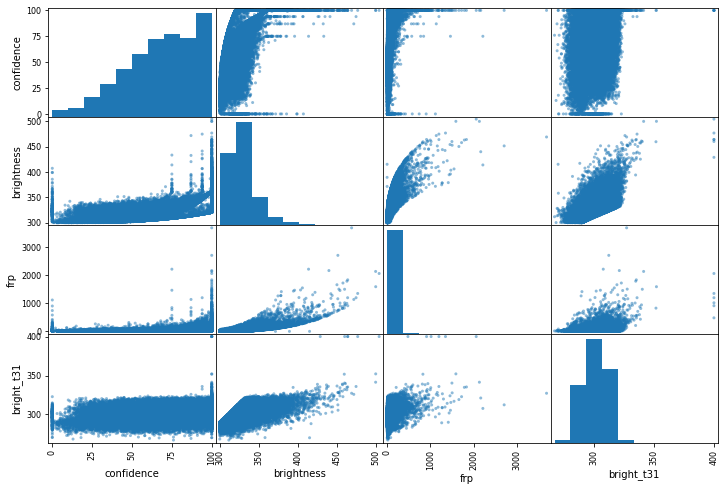

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["confidence", "brightness", "frp",
              "bright_t31"]
scatter_matrix(fire[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(300.0, 500.0, 0.0, 100.0)

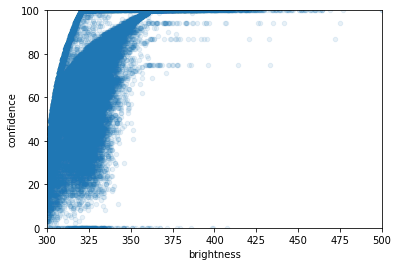

In [19]:
# let’s zoom in on the correlation scatterplot "confidence & the brightness,"
fire.plot(kind="scatter", x="brightness", y="confidence",
             alpha=0.1)
plt.axis([300, 500, 0, 100])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?
#A7:  Due to the upward trend, it can be concluded that the correlation is very strong. There are straight  
#     horizontal lines at around 100, 90, 85, 75 and even around 0. This needs to be considered in order to prevent
#     data quirks

# Dealing with Null Values

Since this dataset does not have null values, we are inserting null values to some records to demonstrate the Data Cleaning Process

In [20]:
sample_incomplete_rows = fire[fire.isnull().any(axis=1)].head()
sample_incomplete_rows

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,NaN,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,NaN,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,NaN,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,NaN,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,NaN,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [21]:
sample_incomplete_rows.dropna(subset=["acq_time"])

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type


In [22]:
sample_incomplete_rows.drop("acq_time", axis=1) 

,latitude,longitude,brightness,scan,track,acq_date,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [44]:
median = fire["acq_time"].median() # calculate the median of total_bedrooms
fire["acq_time"].fillna(median, inplace=True)

In [45]:
fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,424.0,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,424.0,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,424.0,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,424.0,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,424.0,Terra,MODIS,36,6.3,298.8,27.6,D,0


## Scikit-Learn solution (optional)


In [46]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [47]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without cat. data
fire_num = fire.drop(["acq_date","satellite", "instrument", "version", "daynight"] ,axis=1) 

In [48]:
imputer.fit(fire_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [49]:
imputer.statistics_

array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [50]:
fire_num.median().values #Check that this is the same as manually computing the median of each attribute


array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [51]:
X = imputer.transform(fire_num) # transform the data set

In [52]:
fire_tr = pd.DataFrame(X, columns=fire_num.columns,
                          index=fire_num.index) # load the new tranformed data set into the pandas frame fire_tr

### Handling Text and Categorical Attributes

In [53]:
fire_cat = fire[["daynight", "satellite"]]
fire_cat.head(10)  # look at the values for the first 10 instances 

,daynight,satellite
0,D,Terra
1,D,Terra
2,D,Terra
3,D,Terra
4,D,Terra
5,D,Terra
6,D,Terra
7,D,Terra
8,D,Terra
9,D,Terra


In [54]:
fire_cat.tail(10)
# look at the values for the last 10 instances

,daynight,satellite
36001,N,Aqua
36002,N,Aqua
36003,N,Aqua
36004,N,Aqua
36005,N,Aqua
36006,N,Aqua
36007,N,Aqua
36008,N,Aqua
36009,N,Aqua
36010,N,Aqua


In [55]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
fire_cat_encoded = ordinal_encoder.fit_transform(fire_cat)
fire_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?
# A15: There may be a possibility that nearby values are more similar than distant values.However as far as this
# dataset is considered the categorical values have only binary classification. 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [56]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]

In [57]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

<36011x4 sparse matrix of type '<class 'numpy.float64'>'
	with 72022 stored elements in Compressed Sparse Row format>

In [58]:
type(fire_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

scipy.sparse.csr.csr_matrix

In [59]:
fire_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [60]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [61]:
cat_encoder.categories_         # Get a list of categories

[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [62]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set
#A16: Normalisation or Standardisation need to be done on the dataset inorder to scale the values. For eg, 
#     brightness attribute has a min and max values of 300.000000 and 504.4 while frp attribute has a min and max 
#     values of 0 and 3679.5. To avoid the numerical values frm having such different scales, we perform
#     normalisation or standarisation

In [64]:
#Normalisation using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

temp_fire = fire.drop(["acq_date","daynight", "satellite", "instrument"] , axis=1)
#temp_fire.head()
minmax_scaler = MinMaxScaler() #Initialising the MinMaxScaler as a class
print(minmax_scaler.fit(temp_fire)) #Fitting the data 
print(minmax_scaler.data_max_) #Max value of each attribute

MinMaxScaler()
[-1.007260e+01  1.534904e+02  5.044000e+02  4.800000e+00  2.000000e+00
  2.359000e+03  1.000000e+02  6.300000e+00  4.001000e+02  3.679500e+03
  3.000000e+00]


In [69]:
#print(minmax_scaler.transform(temp_fire)) #Transform features by scaling each feature to a given range(0,1)
fire_norm = minmax_scaler.transform(temp_fire) #Normalised data of 11 numerical attributes
print(fire_norm)

[[0.94694434 0.70974278 0.06360078 ... 0.22764838 0.00179372 0.        ]
 [0.94739096 0.71042068 0.0944227  ... 0.22764838 0.00307107 0.        ]
 [0.91535078 0.47656661 0.05675147 ... 0.23816679 0.00627803 0.        ]
 ...
 [0.44260053 0.36581434 0.00831703 ... 0.17580766 0.00149477 0.        ]
 [0.44241699 0.36684769 0.01761252 ... 0.17505635 0.00154912 0.        ]
 [0.3639837  0.18776167 0.04452055 ... 0.17956424 0.00625085 0.66666667]]


In [70]:
# Standarization using StandardScaler()
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler() #Initialising the StandardScaler as a class
print(standard_scaler.fit(temp_fire)) #Fitting the data

StandardScaler()


In [71]:
print(standard_scaler.mean_) #Mean value of each attribute

[-1.91009616e+01  1.38931446e+02  3.28750696e+02  1.62090472e+00
  1.21528144e+00  6.00076810e+02  6.75513871e+01  6.30000000e+00
  3.01339138e+02  5.11321763e+01  1.94385049e-02]


In [74]:
fire_standard = standard_scaler.transform(temp_fire) #Standardize features by removing the mean and scaling to unit variance
print(fire_standard)

[[ 1.00389302  0.33762684 -0.82930942 ... -0.41536427 -0.4825828
  -0.0980141 ]
 [ 1.00590247  0.34050981 -0.4976003  ... -0.41536427 -0.43165021
  -0.0980141 ]
 [ 0.86174521 -0.65401884 -0.90302256 ... -0.27139544 -0.30377689
  -0.0980141 ]
 ...
 [-1.26528325 -1.12502328 -1.42427974 ... -1.12492494 -0.49450319
  -0.0980141 ]
 [-1.26610905 -1.12062864 -1.32424049 ... -1.13520843 -0.49233585
  -0.0980141 ]
 [-1.61900119 -1.88224111 -1.03465316 ... -1.0735075  -0.30486056
   9.98651662]]


In order to best eliminate outliers in the data set, we are going to use the standardised dataset for further processing